## Lab: Principal Component Analysis (PCA)



In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Chargement des données**

In [ ]:
X = np.loadtxt("/Users/hafsaredouane/Downloads/Lecture, exercises, and lab-20250325/Lab/data_pca.txt")
I, N = X.shape

**Étape 1 : Moyenne**

In [2]:
M = np.mean(X, axis=0)

**Étape 2 : Centrage**

In [ ]:
X_centered = X - M

**Étape 3 : Calcul manuel de la matrice de covariance**

In [3]:
Sigma = (1 / I) * X_centered.T @ X_centered  # N x N


**Étape 4 : Valeurs propres et vecteurs propres**

In [11]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices] #vecteurs propres
eigenvectors = eigenvectors[:, sorted_indices]# plus grandes valeurs propres, u1 direction dans laquelle les données sont le plus dispersées
print(eigenvectors, eigenvalues)


[[-0.76908317  0.63914872]
 [-0.63914872 -0.76908317]] [2.06769855 0.30726878]



**Étape 5 : Projection sur l'espace réduit**

In [5]:
P = 1  # nombre de composantes
U_P = eigenvectors[:, :P]
Y_tilde = X_centered @ U_P


**Étape 6 : Représentation dans l'espace initial**

In [6]:
Y_tilde_N = Y_tilde @ U_P.T


**Étape 7 : Reconstruction**

In [ ]:
X_hat = Y_tilde_N + M

**Visualisation 1 : Données centrées et projection**

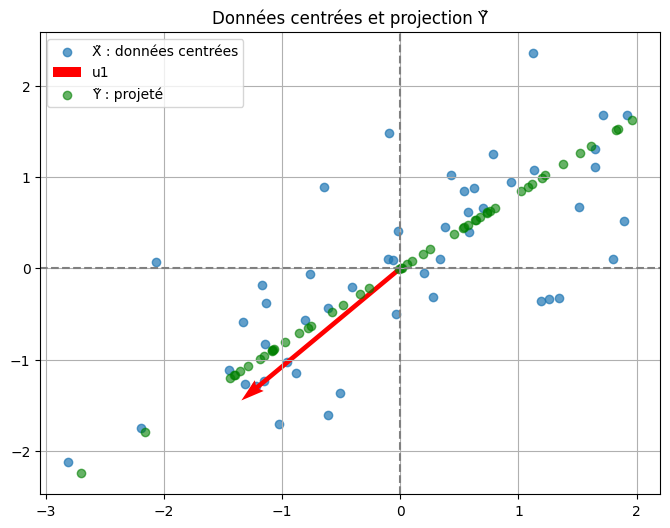

In [8]:

#Centré autour de l’origine, Tracé depuis (0,0)
# PCA projette les données centrées sur l’axe de plus grande variance.

# Ytilde: projection des données centrées X̃ sur les P composantes principales.

#u1: direction dans laquelle les données sont le plus étalées
# données projetées (compressées) sur u₁

plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], label="X̃ : données centrées", alpha=0.7)
origin = np.zeros((2,))
for i in range(P):
    plt.quiver(*origin, *U_P[:, i], scale=3, color='red', label=f"u{i+1}")
plt.scatter(Y_tilde_N[:, 0], Y_tilde_N[:, 1], label="Ỹ : projeté", color='green', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Données centrées et projection Ỹ")
plt.grid()
plt.show()




**Visualisation 2 : Données originales et reconstructions**

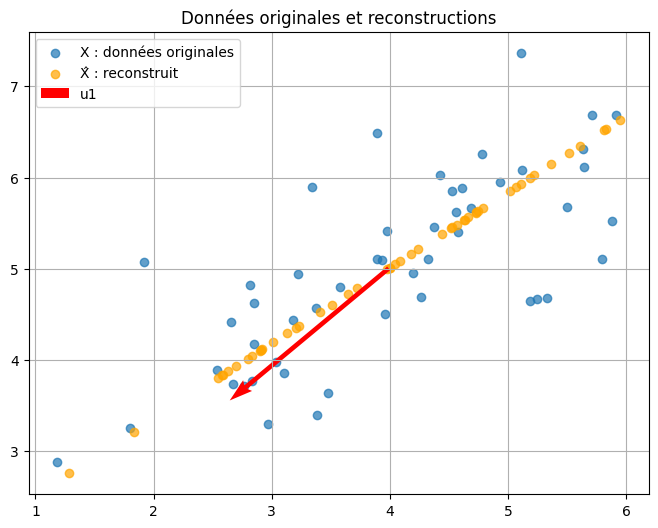

In [9]:
#Espace original, Tracé depuis la moyenne M,
#  PCA permet de reconstruire à partir d’un seul axe : les projections sont compressées, 
# mais proches des vraies données.


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="X : données originales", alpha=0.7)
plt.scatter(X_hat[:, 0], X_hat[:, 1], label="X̂ : reconstruit", color='orange', alpha=0.7)
for i in range(P):
    plt.quiver(*M, *U_P[:, i], scale=3, color='red', label=f"u{i+1}")
plt.legend()
plt.title("Données originales et reconstructions")
plt.grid()
plt.show()